In [75]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
shrooms = pd.read_csv("data/mushrooms.csv")

In [24]:
display(shrooms.columns)
shrooms.head()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
X = shrooms.drop("class", axis=1)
X = pd.get_dummies(X)
y = shrooms["class"]
y = y.map({"p": 1, "e": 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [26]:
# get best logistic regression metrics
logreg = LogisticRegression(max_iter=5000)
param_grid = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "solver": ["liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"]}

grid = GridSearchCV(logreg, param_grid, cv=10, scoring="f1", n_jobs=-1)
grid.fit(X_train, y_train)



GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1')

In [27]:
grid.best_params_

{'C': 1, 'solver': 'liblinear'}

In [28]:
grid.best_score_

1.0

In [29]:
# get classification report for the best logistic regression model
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [30]:
# doing all the same stuff for SVC
svc = SVC()
param_grid_svc = {'C': [0.1, 1, 10, 100], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                  'degree': [2, 3, 4, 5]}

grid_svc = GridSearchCV(svc, param_grid_svc, cv=10, scoring="f1", n_jobs=-1)
grid_svc.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1')

In [31]:
print(f"Best params: {grid_svc.best_params_}")
print(f"Best f1 score: {grid_svc.best_score_}")

Best params: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Best f1 score: 1.0


In [32]:
y_pred_svc = grid_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [33]:
# find the best linear svc
linear_svc = SVC(kernel="linear")
param_grid_linear_svc = {'C': [0.1, 1, 10, 100]}
grid_linear_svc = GridSearchCV(linear_svc, param_grid_linear_svc, cv=10, scoring="f1", n_jobs=-1)
grid_linear_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='f1')

In [34]:
print(f"Best params: {grid_linear_svc.best_params_}")
print(f"Best f1 score: {grid_linear_svc.best_score_}")

Best params: {'C': 1}
Best f1 score: 1.0


In [35]:
y_pred_linear_svc = grid_linear_svc.predict(X_test)
print(classification_report(y_test, y_pred_linear_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



So I don't need a complicated model at all... nice

Maybe try reducing features now?

In [40]:
# get the best logistic regression model's coefficients in order
coefficients = pd.DataFrame({"feature": X.columns, "coefficient": grid.best_estimator_.coef_[0]})
coefficients = coefficients.sort_values(by="coefficient", ascending=False)

In [45]:
coefficients['abs'] = coefficients['coefficient'].abs()
coefficients = coefficients.sort_values(by="abs", ascending=False)

In [47]:
# looking at top 20 features
coefficients.head(20)

,feature,coefficient,abs
27,odor_n,-3.997261,3.997261
100,spore-print-color_r,3.490418,3.490418
25,odor_l,-2.829747,2.829747
22,odor_a,-2.757720,2.757720
23,odor_c,2.706386,2.706386
24,odor_f,2.694988,2.694988
52,stalk-root_b,2.417747,2.417747
36,gill-size_n,2.183929,2.183929
28,odor_p,2.175674,2.175674
35,gill-size_b,-2.107083,2.107083


In [49]:
# find the best model with only the top 10 features
X_top_10 = X[coefficients["feature"].head(10)]
X_train_top_10, X_test_top_10, y_train_top_10, y_test_top_10 = train_test_split(X_top_10, y, test_size=0.2, random_state=7)

In [50]:
# use gridsearch to find the best logistic regression model with only the top 10 features
logreg_top_10 = LogisticRegression(max_iter=5000)
param_grid_top_10 = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "solver": ["liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_top_10 = GridSearchCV(logreg_top_10, param_grid_top_10, cv=10, scoring="f1", n_jobs=-1)
grid_top_10.fit(X_train_top_10, y_train_top_10)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1')

In [51]:
print(f"Best params: {grid_top_10.best_params_}")
print(f"Best f1 score: {grid_top_10.best_score_}")

Best params: {'C': 1, 'solver': 'liblinear'}
Best f1 score: 0.9935654807300149


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       840
           1       1.00      0.99      0.99       785

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



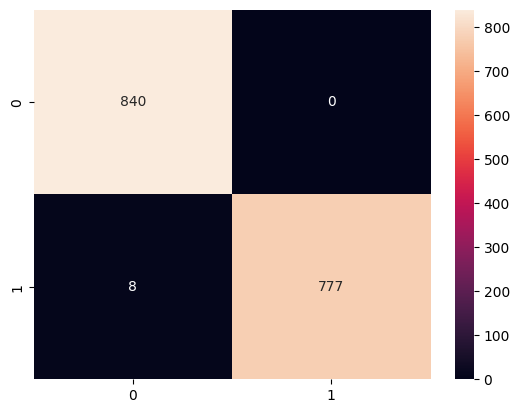

In [57]:
y_pred_top_10 = grid_top_10.predict(X_test_top_10)
print(classification_report(y_test_top_10, y_pred_top_10))
# visualize confusion matrix for the best logistic regression model with only the top 10 features
cm = confusion_matrix(y_test_top_10, y_pred_top_10)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [58]:
# check how well the model does with only the top 5 features
X_top_5 = X[coefficients["feature"].head(5)]
X_train_top_5, X_test_top_5, y_train_top_5, y_test_top_5 = train_test_split(X_top_5, y, test_size=0.2, random_state=7)

In [59]:
# train logistic regression with the top 5 features
logreg_top_5 = LogisticRegression(max_iter=5000)
param_grid_top_5 = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                "solver": ["liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_top_5 = GridSearchCV(logreg_top_5, param_grid_top_5, cv=10, scoring="f1", n_jobs=-1)
grid_top_5.fit(X_train_top_5, y_train_top_5)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1')

In [60]:
print(f"Best params: {grid_top_5.best_params_}")
print(f"Best f1 score: {grid_top_5.best_score_}")

Best params: {'C': 1, 'solver': 'liblinear'}
Best f1 score: 0.9935654807300149


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       840
           1       1.00      0.99      0.99       785

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



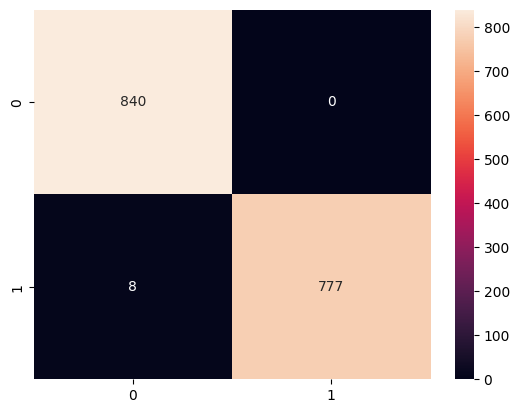

In [61]:
# show confusion matrix for the best logistic regression model with only the top 5 features
y_pred_top_5 = grid_top_5.predict(X_test_top_5)
print(classification_report(y_test_top_5, y_pred_top_5))
cm_top_5 = confusion_matrix(y_test_top_5, y_pred_top_5)
sns.heatmap(cm_top_5, annot=True, fmt="d")
plt.show()

In [63]:
# find the top 10 features for the best SVC model
coefficients_svc = pd.DataFrame({"feature": X.columns, "coefficient": grid_linear_svc.best_estimator_.coef_[0]})
coefficients_svc['abs'] = coefficients_svc['coefficient'].abs()
coefficients_svc = coefficients_svc.sort_values(by="abs", ascending=False)
coefficients_svc

,feature,coefficient,abs
100,spore-print-color_r,1.468686,1.468686
23,odor_c,1.072082,1.072082
25,odor_l,-1.012264,1.012264
22,odor_a,-1.012237,1.012237
27,odor_n,-0.870139,0.870139
...,...,...,...
93,ring-type_n,0.000000,0.000000
104,population_a,0.000000,0.000000
45,gill-color_r,0.000000,0.000000
65,stalk-color-above-ring_c,0.000000,0.000000


In [64]:
X_top_10_svc = X[coefficients_svc["feature"].head(10)]
X_train_top_10_svc, X_test_top_10_svc, y_train_top_10_svc, y_test_top_10_svc = train_test_split(X_top_10_svc, y, test_size=0.2, random_state=7)

In [65]:
# train SVC with the top 10 features
svc_top_10 = SVC(kernel="linear")
param_grid_top_10_svc = {'C': [0.001, 0.1, 1, 10, 100]}
grid_top_10_svc = GridSearchCV(svc_top_10, param_grid_top_10_svc, cv=10, scoring="f1", n_jobs=-1)
grid_top_10_svc.fit(X_train_top_10_svc, y_train_top_10_svc)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100]}, scoring='f1')

In [66]:
print(f"Best params: {grid_top_10_svc.best_params_}")
print(f"Best f1 score: {grid_top_10_svc.best_score_}")

Best params: {'C': 1}
Best f1 score: 0.9948573425474475


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       840
           1       1.00      0.99      0.99       785

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



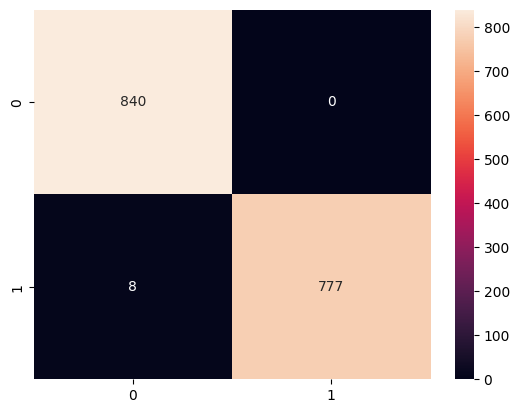

In [70]:
# show confusion matrix for the best SVC model with only the top 10 features
y_pred_top_10_svc = grid_top_10_svc.predict(X_test_top_10_svc)
print(classification_report(y_test_top_10_svc, y_pred_top_10_svc))
cm_top_10_svc = confusion_matrix(y_test_top_10_svc, y_pred_top_10_svc)
sns.heatmap(cm_top_10_svc, annot=True, fmt="d")
plt.show()

In [67]:
# find the top 5 features for the best SVC model
X_top_5_svc = X[coefficients_svc["feature"].head(5)]
X_train_top_5_svc, X_test_top_5_svc, y_train_top_5_svc, y_test_top_5_svc = train_test_split(X_top_5_svc, y, test_size=0.2, random_state=7)

In [68]:
svc_top_5 = SVC(kernel="linear")
param_grid_top_5_svc = {'C': [0.001, 0.1, 1, 10, 100]}
grid_top_5_svc = GridSearchCV(svc_top_5, param_grid_top_5_svc, cv=10, scoring="f1", n_jobs=-1)
grid_top_5_svc.fit(X_train_top_5_svc, y_train_top_5_svc)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100]}, scoring='f1')

In [69]:
print(f"Best params: {grid_top_5_svc.best_params_}")
print(f"Best f1 score: {grid_top_5_svc.best_score_}")

Best params: {'C': 0.1}
Best f1 score: 0.9935654807300149


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       840
           1       1.00      0.99      0.99       785

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



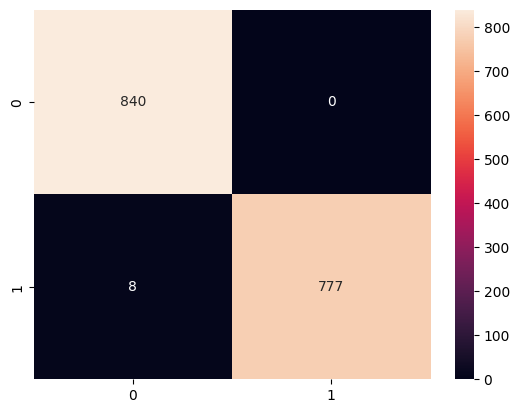

In [71]:
# show confusion matrix for the best SVC model with only the top 5 features
y_pred_top_5_svc = grid_top_5_svc.predict(X_test_top_5_svc)
print(classification_report(y_test_top_5_svc, y_pred_top_5_svc))
cm_top_5_svc = confusion_matrix(y_test_top_5_svc, y_pred_top_5_svc)
sns.heatmap(cm_top_5_svc, annot=True, fmt="d")
plt.show()

In [72]:
# fit using top 3 features of logistic regression
X_top_3 = X[coefficients["feature"].head(3)]
X_train_top_3, X_test_top_3, y_train_top_3, y_test_top_3 = train_test_split(X_top_3, y, test_size=0.2, random_state=7)


Best params: {'C': 1, 'solver': 'liblinear'}
Best f1 score: 0.9467780186282242
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       840
           1       0.89      0.99      0.94       785

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



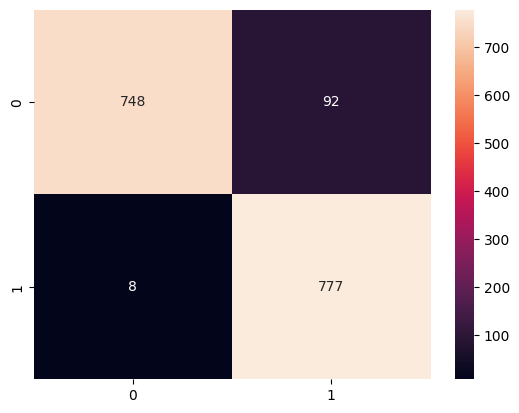

In [73]:
logreg_top_3 = LogisticRegression(max_iter=5000)
param_grid_top_3 = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                "solver": ["liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_top_3 = GridSearchCV(logreg_top_3, param_grid_top_3, cv=10, scoring="f1", n_jobs=-1)
grid_top_3.fit(X_train_top_3, y_train_top_3)

print(f"Best params: {grid_top_3.best_params_}")
print(f"Best f1 score: {grid_top_3.best_score_}")

# show confusion matrix for the best logistic regression model with only the top 3 features
y_pred_top_3 = grid_top_3.predict(X_test_top_3)
print(classification_report(y_test_top_3, y_pred_top_3))
cm_top_3 = confusion_matrix(y_test_top_3, y_pred_top_3)
sns.heatmap(cm_top_3, annot=True, fmt="d")
plt.show()

Best params: {'C': 0.1}
Best f1 score: 0.127209887155988
              precision    recall  f1-score   support

           0       0.53      1.00      0.70       840
           1       1.00      0.06      0.12       785

    accuracy                           0.55      1625
   macro avg       0.77      0.53      0.41      1625
weighted avg       0.76      0.55      0.42      1625



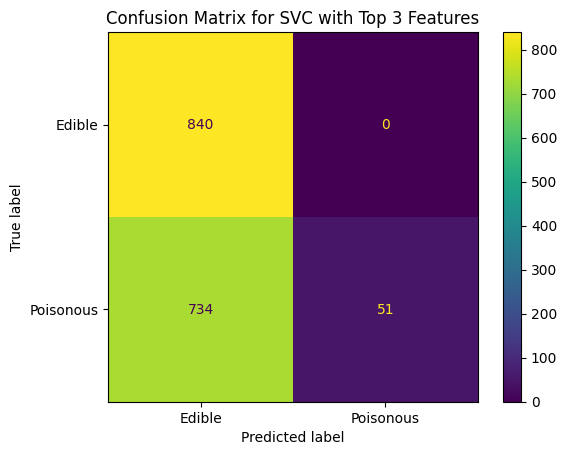

In [85]:
# fit using top 3 features of SVC
X_top_3_svc = X[coefficients_svc["feature"].head(3)]
X_train_top_3_svc, X_test_top_3_svc, y_train_top_3_svc, y_test_top_3_svc = train_test_split(X_top_3_svc, y, test_size=0.2, random_state=7)

svc_top_3 = SVC(kernel="linear")
param_grid_top_3_svc = {'C': [0.001, 0.1, 1, 10, 100]}
grid_top_3_svc = GridSearchCV(svc_top_3, param_grid_top_3_svc, cv=10, scoring="f1", n_jobs=-1)
grid_top_3_svc.fit(X_train_top_3_svc, y_train_top_3_svc)

print(f"Best params: {grid_top_3_svc.best_params_}")
print(f"Best f1 score: {grid_top_3_svc.best_score_}")

# show confusion matrix for the best SVC model with only the top 3 features
y_pred_top_3_svc = grid_top_3_svc.predict(X_test_top_3_svc)
print(classification_report(y_test_top_3_svc, y_pred_top_3_svc))
cm_top_3_svc = confusion_matrix(y_test_top_3_svc, y_pred_top_3_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_top_3_svc, display_labels=["Edible", "Poisonous"])
disp.plot()
plt.title("Confusion Matrix for SVC with Top 3 Features")
plt.show()

Best params: {'C': 0.1}
Best f1 score: 0.9935654807300149
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       840
           1       1.00      0.99      0.99       785

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



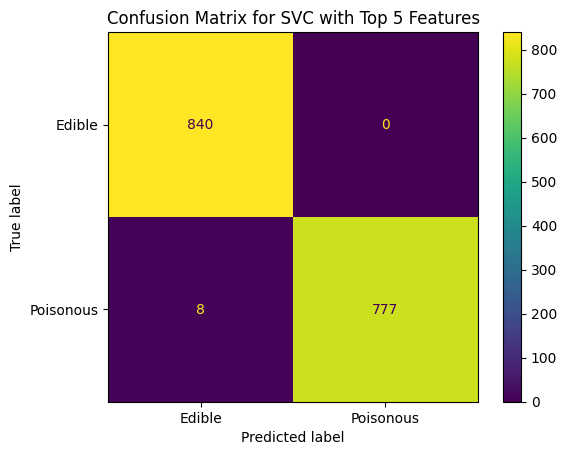

In [84]:
# do the same but for the top 5 features of the SVC model
X_top_5_svc = X[coefficients_svc["feature"].head(5)]
X_train_top_5_svc, X_test_top_5_svc, y_train_top_5_svc, y_test_top_5_svc = train_test_split(X_top_5_svc, y, test_size=0.2, random_state=7)

svc_top_5 = SVC(kernel="linear")
param_grid_top_5_svc = {'C': [0.001, 0.1, 1, 10, 100]}
grid_top_5_svc = GridSearchCV(svc_top_5, param_grid_top_5_svc, cv=10, scoring="f1", n_jobs=-1)
grid_top_5_svc.fit(X_train_top_5_svc, y_train_top_5_svc)

print(f"Best params: {grid_top_5_svc.best_params_}")
print(f"Best f1 score: {grid_top_5_svc.best_score_}")

# show confusion matrix for the best SVC model with only the top 5 features
y_pred_top_5_svc = grid_top_5_svc.predict(X_test_top_5_svc)
print(classification_report(y_test_top_5_svc, y_pred_top_5_svc))
cm_top_5_svc = confusion_matrix(y_test_top_5_svc, y_pred_top_5_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_top_5_svc, display_labels=["Edible", "Poisonous"])
disp.plot()
plt.title("Confusion Matrix for SVC with Top 5 Features")
plt.show()


Best params: {'C': 1, 'solver': 'liblinear'}
Best f1 score: 0.9467780186282242
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       840
           1       0.89      0.99      0.94       785

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Top 3 Features')

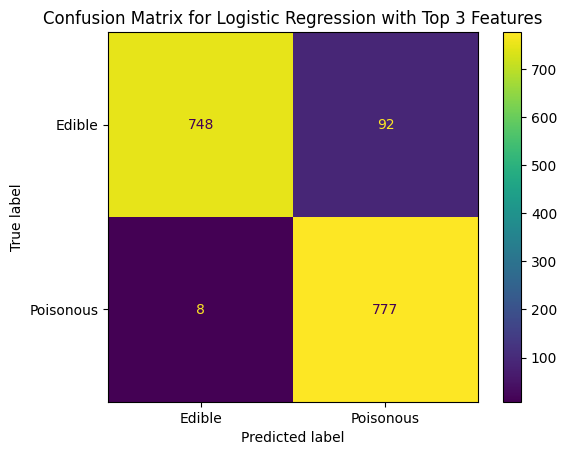

In [89]:
# logistic regression model with 3 was just almost as good as the SVC model with 5
logreg_top_3 = LogisticRegression(max_iter=5000)
param_grid_top_3 = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                "solver": ["liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_top_3 = GridSearchCV(logreg_top_3, param_grid_top_3, cv=10, scoring="f1", n_jobs=-1)
grid_top_3.fit(X_train_top_3, y_train_top_3)

print(f"Best params: {grid_top_3.best_params_}")
print(f"Best f1 score: {grid_top_3.best_score_}")

# show confusion matrix for the best logistic regression model with only the top 3 features
y_pred_top_3 = grid_top_3.predict(X_test_top_3)
print(classification_report(y_test_top_3, y_pred_top_3))
cm_top_3 = confusion_matrix(y_test_top_3, y_pred_top_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_top_3, display_labels=["Edible", "Poisonous"])
disp.plot()
plt.title("Confusion Matrix for Logistic Regression with Top 3 Features")

In [87]:
# look at the top 5 features of the SVC model
coefficients_svc.head(5)


,feature,coefficient,abs
100,spore-print-color_r,1.468686,1.468686
23,odor_c,1.072082,1.072082
25,odor_l,-1.012264,1.012264
22,odor_a,-1.012237,1.012237
27,odor_n,-0.870139,0.870139


In [88]:
# look at the top 3 features of the logistic regression model
coefficients.head(3)

,feature,coefficient,abs
27,odor_n,-3.997261,3.997261
100,spore-print-color_r,3.490418,3.490418
25,odor_l,-2.829747,2.829747


KeyError: 'class'

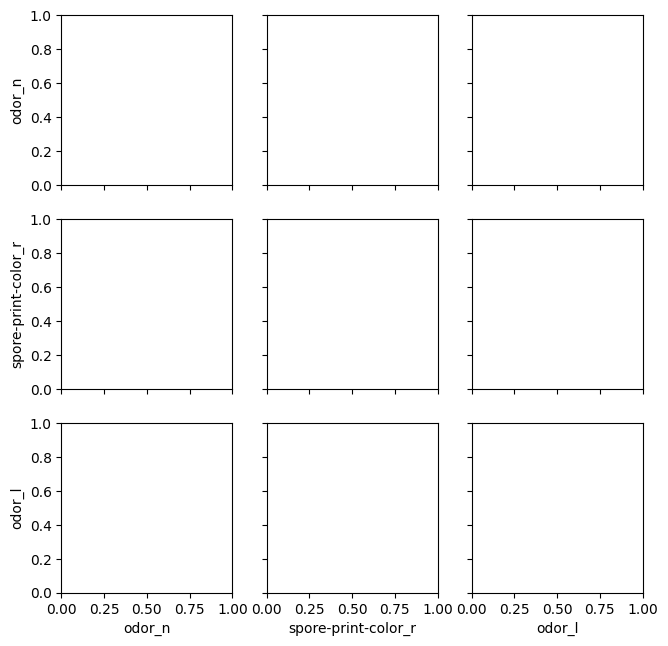

In [90]:
# show plot of X vs y for the top 3 features of the logistic regression model

